## 1. Data Loading and Initial Exploration

In [1]:
import pandas as pd
path = '../bitcoin_price_sentiment.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              222 non-null    object 
 1   Open              222 non-null    float64
 2   High              222 non-null    float64
 3   Low               222 non-null    float64
 4   Close             222 non-null    float64
 5   Volume            222 non-null    float64
 6   sentiment_scores  222 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.3+ KB


In [2]:
df.head()

,date,Open,High,Low,Close,Volume,sentiment_scores
0,2021-02-05,37494.08,37506.29,37372.59,37423.85,31.356678,0.131285
1,2021-02-06,40329.59,40362.46,40328.95,40341.59,0.369795,0.137975
2,2021-02-07,38371.71,38371.71,38319.25,38319.25,2.961660,0.140346
3,2021-02-08,42739.45,42739.45,42661.76,42705.78,1.481081,0.155133
4,2021-02-09,47062.03,47097.63,47015.62,47072.73,23.373384,0.149979


In [3]:
df.shape

(222, 7)

In [4]:
# Check for and handle any missing values (e.g., imputation, removal)
print(df.isnull().sum())

date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
sentiment_scores    0
dtype: int64


In [5]:
# Display summary statistics
df.describe()

,Open,High,Low,Close,Volume,sentiment_scores
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,37581.141667,37603.465811,37555.765631,37578.528468,3.133113,0.201493
std,13785.771412,13797.418839,13777.022992,13788.287687,5.733961,0.060847
min,15959.000000,15959.000000,15953.000000,15954.000000,0.000000,0.074909
25%,23974.830000,23988.162500,23948.705000,23962.955000,0.155010,0.154443
50%,39049.095000,39066.155000,39033.180000,39037.515000,0.858310,0.193954
75%,46620.127500,46624.275000,46593.165000,46624.200000,3.295741,0.252274
max,66472.300000,66500.960000,66374.090000,66407.910000,31.356678,0.405695


# 2. Data Visualization

In [6]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Set 'date' as index
df.set_index('date', inplace=True)

In [8]:
print(f"Date range: from {df.index.min()} to {df.index.max()}")

Date range: from 2021-02-05 00:00:00 to 2023-01-09 00:00:00


In [9]:
# Calculate the total number of days
total_days = (df.index.max() - df.index.min()).days + 1  # +1 to include both start and end dates
print(f"Total number of days: {total_days}")

# Check for gaps in the time series
date_range = pd.date_range(start=df.index.min(), end=df.index.max())
missing_dates = date_range.difference(df.index)
print(f"Number of missing dates: {len(missing_dates)}")

Total number of days: 704
Number of missing dates: 482


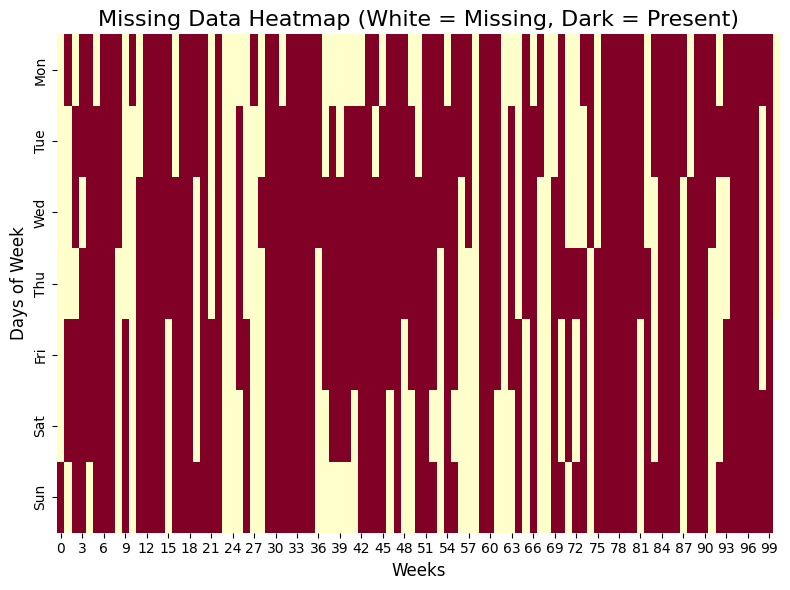

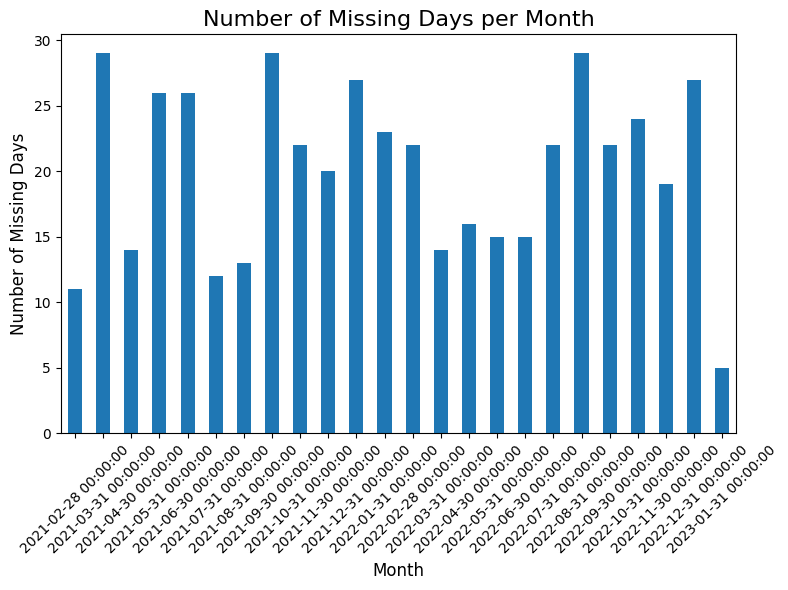

Total number of days: 704
Number of days with data: 222
Number of missing days: 482

Months with most missing data:
2021-03: 29 days
2021-09: 29 days
2022-08: 29 days


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_missing_data(df):
    # Create a date range covering the entire period
    full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    
    # Create a DataFrame with the full date range
    date_df = pd.DataFrame(index=full_date_range)
    
    # Mark dates present in the original data
    date_df['present'] = date_df.index.isin(df.index)
    
    # Calculate missing data by month
    monthly_missing = date_df.resample('ME')['present'].apply(lambda x: (~x).sum())
    
    # Set up the plot
    plt.figure(figsize=(8, 6))
    
    # Create a heatmap
    heatmap_data = date_df['present'].values
    num_weeks = len(heatmap_data) // 7
    remainder = len(heatmap_data) % 7
    
    if remainder > 0:
        padding = np.full(7 - remainder, np.nan)
        heatmap_data = np.concatenate([heatmap_data, padding])
    
    heatmap_data = heatmap_data.reshape(-1, 7).T
    
    sns.heatmap(heatmap_data, 
                cmap='YlOrRd_r', cbar=False, 
                xticklabels='auto', yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                mask=np.isnan(heatmap_data))
    
    # Customize the plot
    plt.title('Missing Data Heatmap (White = Missing, Dark = Present)', fontsize=16)
    plt.xlabel('Weeks', fontsize=12)
    plt.ylabel('Days of Week', fontsize=12)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Plot monthly missing data
    plt.figure(figsize=(8, 6))
    monthly_missing.plot(kind='bar')
    plt.title('Number of Missing Days per Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Missing Days', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"Total number of days: {len(full_date_range)}")
    print(f"Number of days with data: {date_df['present'].sum()}")
    print(f"Number of missing days: {(~date_df['present']).sum()}")
    
    # Identify months with most missing data
    top_missing = monthly_missing.nlargest(3)
    print("\nMonths with most missing data:")
    for month, count in top_missing.items():
        print(f"{month.strftime('%Y-%m')}: {count} days")

# Assuming df is your DataFrame with datetime index
visualize_missing_data(df)

In [11]:
# Print some key statistics
print(f"Highest closing price: ${df['Close'].max():.2f}")
print(f"Lowest closing price: ${df['Close'].min():.2f}")
print(f"Average daily trading volume: {df['Volume'].mean():.0f}")
print(f"Median sentiment score: {df['sentiment_scores'].median():.2f}")

Highest closing price: $66407.91
Lowest closing price: $15954.00
Average daily trading volume: 3
Median sentiment score: 0.19


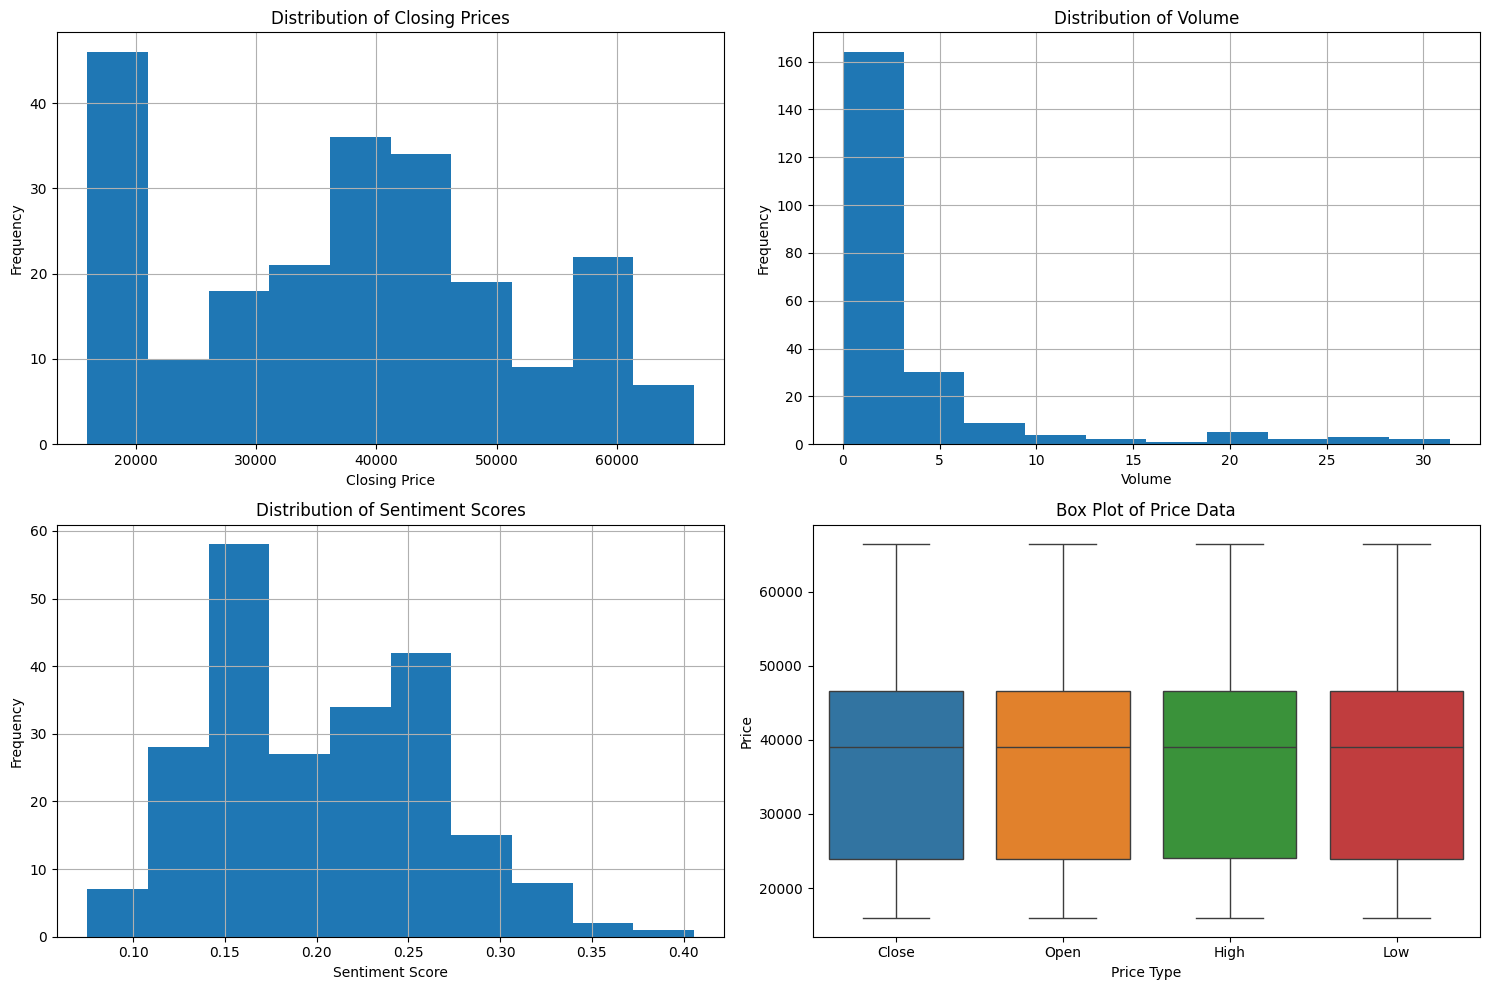

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['Close'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Closing Prices')
axes[0, 0].set_xlabel('Closing Price')
axes[0, 0].set_ylabel('Frequency')

df['Volume'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Volume')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')

df['sentiment_scores'].hist(ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sentiment Scores')
axes[1, 0].set_xlabel('Sentiment Score')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(data=df[['Close', 'Open', 'High', 'Low']], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Price Data')
axes[1, 1].set_xlabel('Price Type')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

Number of outliers in Close price: 0
Number of outliers in Volume: 22


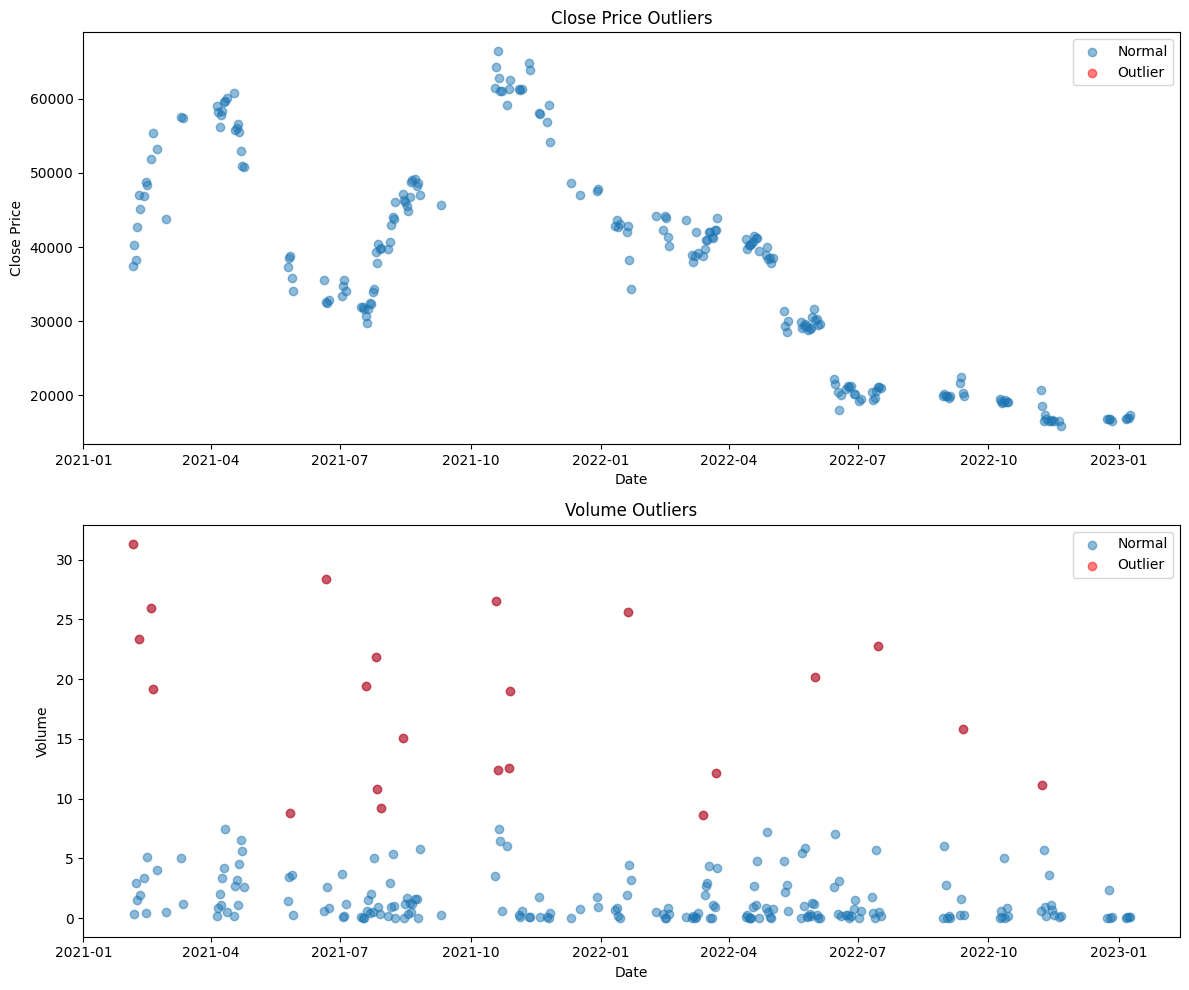


Volume Outliers Summary:
count    22.000000
mean     18.200982
std       6.942348
min       8.641312
25%      12.179298
50%      19.080795
75%      23.234797
max      31.356678
Name: Volume, dtype: float64


In [13]:
# Outlier Analysis
import numpy as np

def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in Close price
price_outliers = detect_outliers(df, 'Close')

# Detect outliers in Volume
volume_outliers = detect_outliers(df, 'Volume')

print("Number of outliers in Close price:", len(price_outliers))
print("Number of outliers in Volume:", len(volume_outliers))

# Visualize outliers
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Close price outliers
ax1.scatter(df.index, df['Close'], alpha=0.5, label='Normal')
ax1.scatter(price_outliers.index, price_outliers['Close'], color='red', alpha=0.5, label='Outlier')
ax1.set_title('Close Price Outliers')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax1.legend()

# Volume outliers
ax2.scatter(df.index, df['Volume'], alpha=0.5, label='Normal')
ax2.scatter(volume_outliers.index, volume_outliers['Volume'], color='red', alpha=0.5, label='Outlier')
ax2.set_title('Volume Outliers')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend()

plt.tight_layout()
plt.show()

# Print some statistics about the outliers
if len(price_outliers) > 0:
    print("\nClose Price Outliers Summary:")
    print(price_outliers['Close'].describe())

if len(volume_outliers) > 0:
    print("\nVolume Outliers Summary:")
    print(volume_outliers['Volume'].describe())

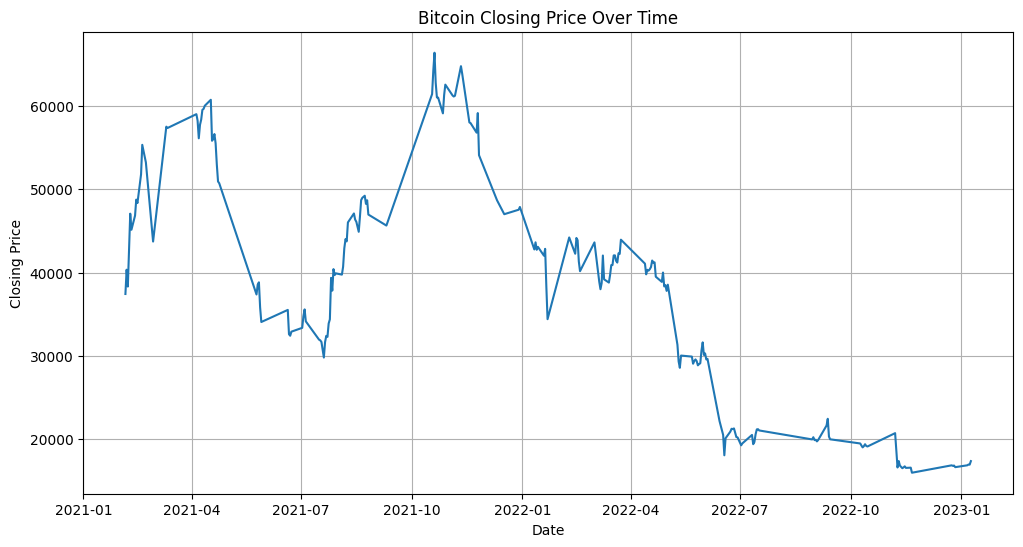

Overall price change: -53.64%


In [14]:
import matplotlib.pyplot as plt
# Bitcoin price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Calculate and print price change
price_change = ((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]) * 100
print(f"Overall price change: {price_change:.2f}%")

Text(0.5, 0, 'Closing Price')

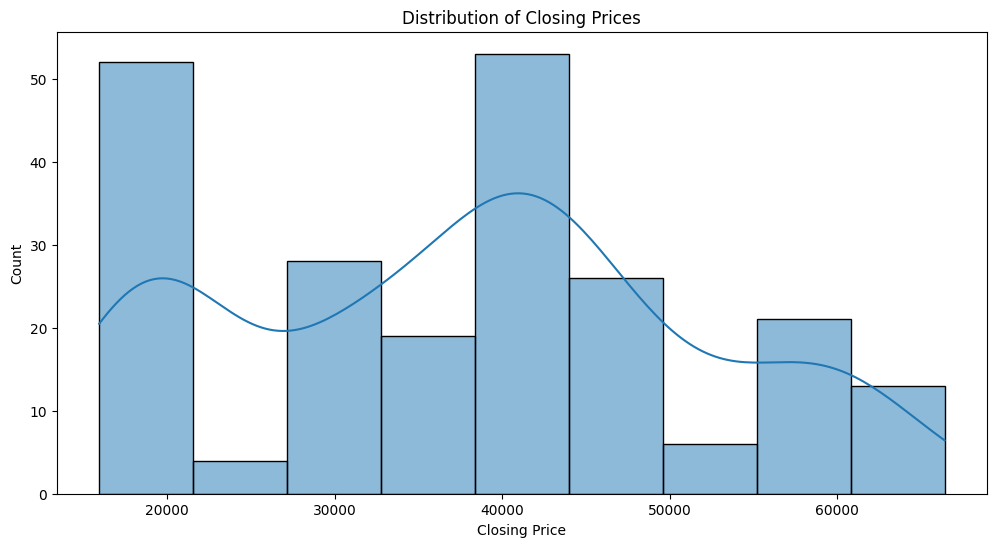

In [15]:
# Distribution of closing prices
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')

Text(0, 0.5, 'Volume')

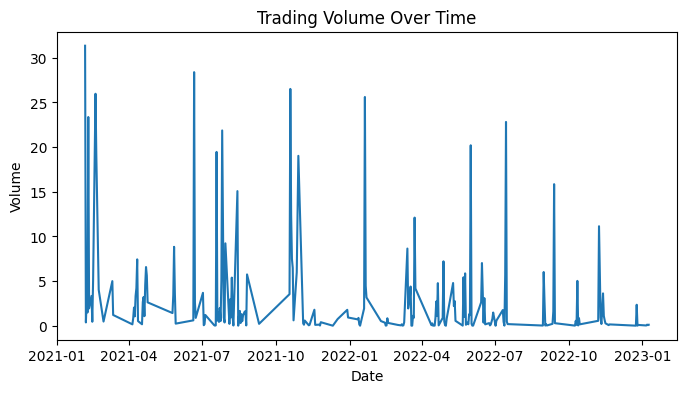

In [16]:
# Volume over time
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

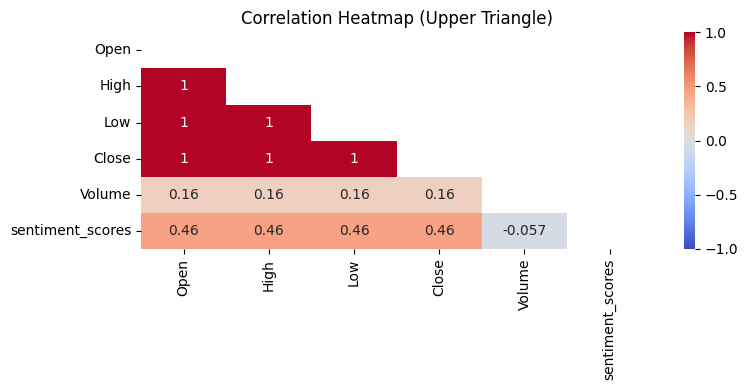


Correlation Matrix:
                      Open      High       Low     Close    Volume  \
Open              1.000000  0.999997  0.999994  0.999993  0.156625   
High              0.999997  1.000000  0.999993  0.999995  0.157156   
Low               0.999994  0.999993  1.000000  0.999998  0.155010   
Close             0.999993  0.999995  0.999998  1.000000  0.155510   
Volume            0.156625  0.157156  0.155010  0.155510  1.000000   
sentiment_scores  0.458088  0.458027  0.458401  0.458301 -0.057288   

                  sentiment_scores  
Open                      0.458088  
High                      0.458027  
Low                       0.458401  
Close                     0.458301  
Volume                   -0.057288  
sentiment_scores          1.000000  


In [17]:
# Correlation heatmap
plt.figure(figsize=(8, 4))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Upper Triangle)')
plt.tight_layout()
plt.show()
# Print the correlation matrix
print("\nCorrelation Matrix:")
print(corr)

**Key Findings:**
- The high correlation among price indicators (Open, High, Low, Close) is expected, as they all reflect the price of the same asset.
- The positive correlation between sentiment scores and price indicators suggests that market sentiment may have some influence on price movements.
- The weak correlation of volume with other indicators implies it may be influenced by additional factors not captured in this analysis.

In [18]:
df.head()

,Open,High,Low,Close,Volume,sentiment_scores
date,,,,,,
2021-02-05,37494.08,37506.29,37372.59,37423.85,31.356678,0.131285
2021-02-06,40329.59,40362.46,40328.95,40341.59,0.369795,0.137975
2021-02-07,38371.71,38371.71,38319.25,38319.25,2.961660,0.140346
2021-02-08,42739.45,42739.45,42661.76,42705.78,1.481081,0.155133
2021-02-09,47062.03,47097.63,47015.62,47072.73,23.373384,0.149979


# 3. Feature Selection and Data Preparation

In [19]:
# Feature Selection
selected_features = ['Open', 'Volume', 'sentiment_scores']
target = 'Close'

In [20]:
X = df[selected_features]
y = df[target]

In [21]:
# Data Normalization 
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns, index=X.index)
y_normalized = pd.DataFrame(scaler_y.fit_transform(y.values.reshape(-1, 1)), columns=[target], index=y.index)


In [22]:
print("Normalized X head:")
print(X_normalized.head())
print("\nNormalized y head:")
print(y_normalized.head())

Normalized X head:
                Open    Volume  sentiment_scores
date                                            
2021-02-05  0.426325  1.000000          0.170430
2021-02-06  0.482459  0.011793          0.190654
2021-02-07  0.443699  0.094451          0.197823
2021-02-08  0.530166  0.047233          0.242525
2021-02-09  0.615739  0.745404          0.226944

Normalized y head:
               Close
date                
2021-02-05  0.425534
2021-02-06  0.483364
2021-02-07  0.443281
2021-02-08  0.530222
2021-02-09  0.616775


# 4.Price Prediction

## 4.1 Data Sequence Preparation

In [23]:
import numpy as np

def create_sequences(X, y, time_steps=1):
    """
    Create input sequences and target values for time series prediction
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Set the number of time steps (days) to use for prediction
TIME_STEPS = 60  # Using 60 days of historical data to predict the next day

# Create sequences for LSTM input
X_seq, y_seq = create_sequences(X_normalized, y_normalized, TIME_STEPS)

print("Shape of the input sequences:", X_seq.shape)
print("Shape of the output sequences:", y_seq.shape)

Shape of the input sequences: (162, 60, 3)
Shape of the output sequences: (162, 1)


## 4.2 Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Data Shape: (129, 60, 3)
Testing Data Shape: (33, 60, 3)
Training Labels Shape: (129, 1)
Testing Labels Shape: (33, 1)


# 4.3 LSTM Model Construction

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(60, 3)),
    Dropout(0.3),
    LSTM(units=50, activation='relu'),
    Dropout(0.4),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print model summary
model.summary()

2024-10-20 21:18:04.224289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/mxq/.pyenv/versions/my-env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2


l1_factor = 1e-5
l2_factor = 1e-4
regularizer = l1_l2(l1=l1_factor, l2=l2_factor)

model = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(60, 3),
         kernel_regularizer=regularizer, recurrent_regularizer=regularizer),
    Dropout(0.3),
    LSTM(units=50, activation='relu',
         kernel_regularizer=regularizer, recurrent_regularizer=regularizer),
    Dropout(0.4),
    Dense(units=1, kernel_regularizer=regularizer)
])

model.compile(optimizer='adam', loss='mean_squared_error')

## 4.4 Model Training

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - loss: 0.2633 - val_loss: 0.1962 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2004 - val_loss: 0.1472 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1516 - val_loss: 0.0929 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0866 - val_loss: 0.0713 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0855 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0636 - val_loss: 0.0610 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0629 - val_loss: 0.0639 - learning_rate: 0.0010
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0660 - val_loss: 0.0591 - learning_rate: 0.0010
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0665 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 10/100
4/4 ━━━━━━━━━━

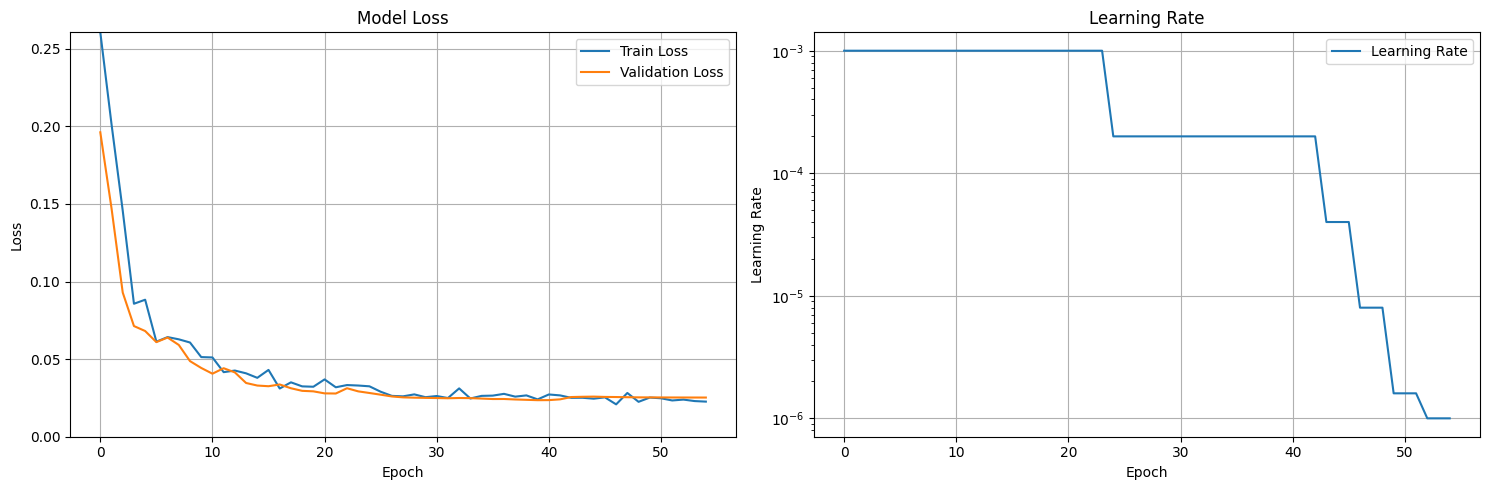

Final training loss: 0.0226
Final validation loss: 0.0252
Final learning rate: 1.00e-06


In [27]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

class LearningRateLogger(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []

    def on_epoch_begin(self, epoch, logs=None):
        optimizer = self.model.optimizer
        lr = float(tf.keras.backend.get_value(optimizer.learning_rate))
        self.learning_rates.append(lr)

# Assume model, X_train, y_train are already defined

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
lr_logger = LearningRateLogger()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, model_checkpoint, lr_logger],
    verbose=1
)

# Add learning rates to history object
history.history['lr'] = lr_logger.learning_rates

# Print the number of epochs the model actually trained for
print(f"The model trained for {len(history.history['loss'])} epochs")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))

# Plot learning rate
plt.subplot(1, 2, 2)
plt.plot(history.history['lr'], label='Learning Rate')
plt.title('Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Optional: Print final loss values
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final learning rate: {history.history['lr'][-1]:.2e}")

# 5. Model Evaluation and Visualization

## 5.1Evaluate on Test Set

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step
Mean Squared Error: 20677174.3813
Root Mean Squared Error: 4547.2161
Mean Absolute Error: 3087.6186
R-squared Score: 0.9090


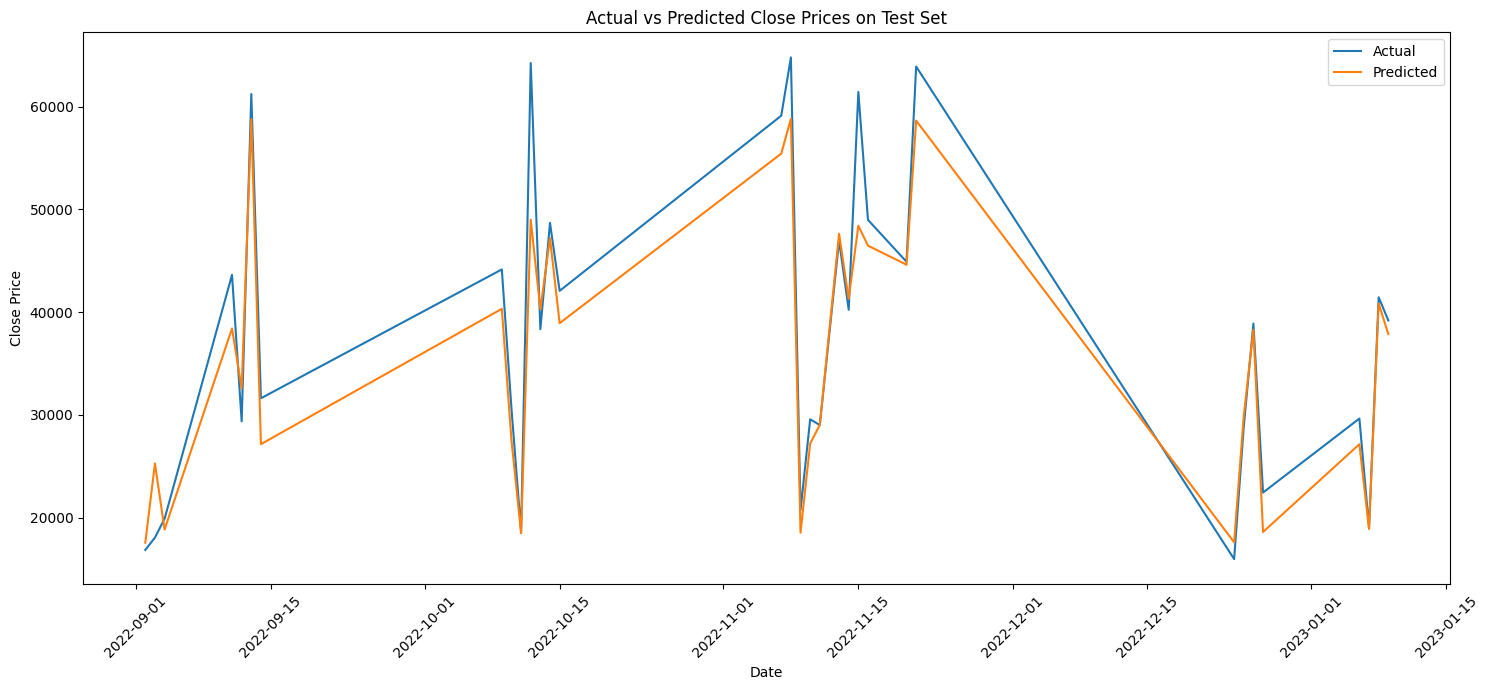

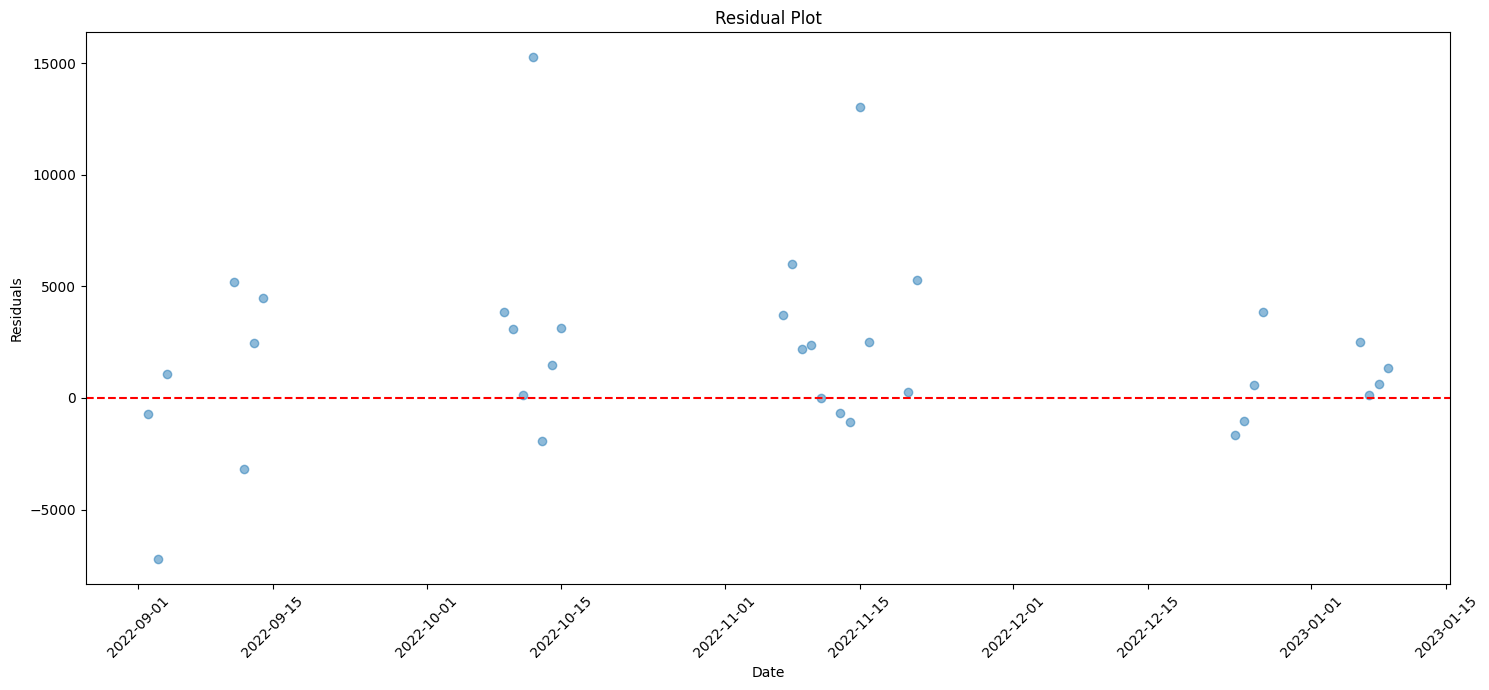

Mean Absolute Percentage Error: 8.15%
Median Percentage Error: 4.00%
Standard Deviation of Percentage Error: 10.90%


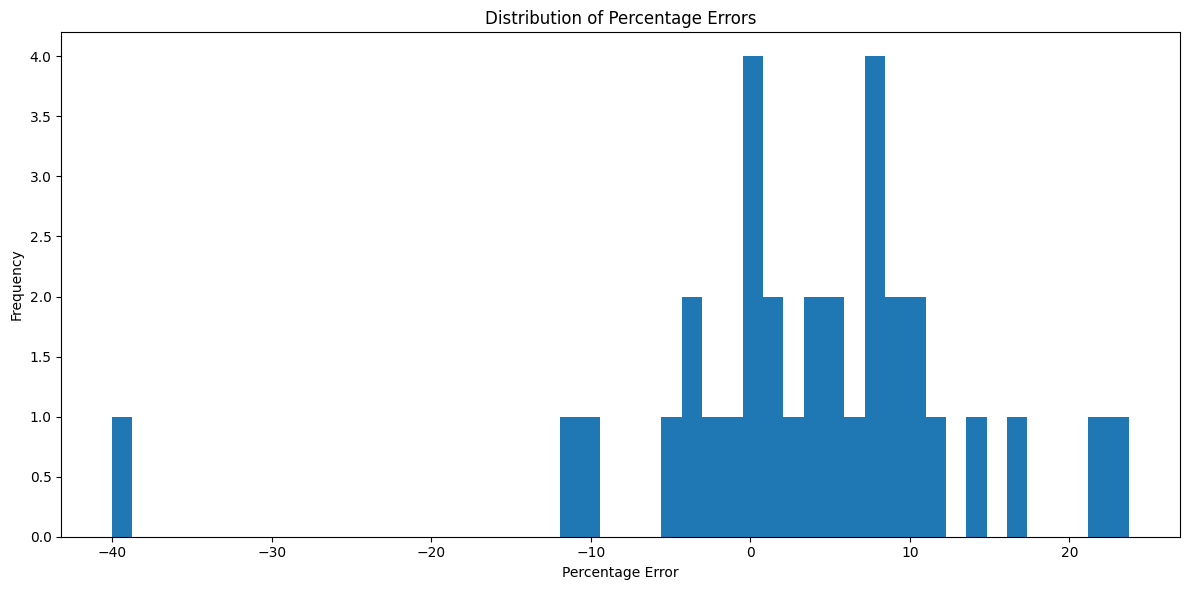

        Date  Actual_Price  Predicted_Price  Absolute_Error  Percentage_Error
0 2022-09-02      16845.00     17555.619141      710.619141          4.218576
1 2022-09-03      18047.74     25268.048828     7220.308828         40.006720
2 2022-09-04      19881.00     18825.632812     1055.367188          5.308421
3 2022-09-11      43621.93     38408.167969     5213.762031         11.952158
4 2022-09-12      29362.16     32561.683594     3199.523594         10.896758


In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming 'model' is your trained LSTM model
# X_test and y_test are your normalized and sequenced test data
# df is your original DataFrame with a DatetimeIndex

# Make predictions on the normalized test set
y_pred_normalized = model.predict(X_test)

# Recreate the scaler with the same parameters as used for training
y_scaler = MinMaxScaler()
y_scaler.fit(df[target].values.reshape(-1, 1))

# Reverse the normalization
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_original = y_scaler.inverse_transform(y_pred_normalized).flatten()

# Get the dates for the test set
test_dates = df.index[-len(y_test):]

# Calculate various metrics on the original scale
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot actual vs predicted values with real dates
plt.figure(figsize=(15, 7))
plt.plot(test_dates, y_test_original, label='Actual')
plt.plot(test_dates, y_pred_original, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Prices on Test Set")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot residuals with real dates
residuals = y_test_original - y_pred_original
plt.figure(figsize=(15, 7))
plt.scatter(test_dates, residuals, alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate percentage error
percentage_error = (y_test_original - y_pred_original) / y_test_original * 100

# Print some statistics about the percentage error
print(f"Mean Absolute Percentage Error: {np.mean(np.abs(percentage_error)):.2f}%")
print(f"Median Percentage Error: {np.median(percentage_error):.2f}%")
print(f"Standard Deviation of Percentage Error: {np.std(percentage_error):.2f}%")

# Plot histogram of percentage errors
plt.figure(figsize=(12, 6))
plt.hist(percentage_error, bins=50)
plt.xlabel("Percentage Error")
plt.ylabel("Frequency")
plt.title("Distribution of Percentage Errors")
plt.tight_layout()
plt.show()

# Create a DataFrame with actual dates, actual prices, and predicted prices
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual_Price': y_test_original,
    'Predicted_Price': y_pred_original,
    'Absolute_Error': np.abs(y_test_original - y_pred_original),
    'Percentage_Error': np.abs(percentage_error)
})

# Display the first few rows of the results
print(results_df.head())

# Optional: Save the results to a CSV file
# results_df.to_csv('prediction_results.csv', index=False)